# Ranking Evaluation

Below measures can be used to measure the gooodness of a ranked list. This might be a ranked list for a search query or a ranked list of recommendations.

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

Suppose that we have a set of items some of which are relevant. For example:

items: a, b, c, d, e, f, g <br>
rel_items = b, f

You can think of these items as movies. The relevant items are those which a user U watched in the past. We want to rank these items according to their relevance to user U.

Suppose that we use two different methods: A and B.

The best ranking is the one which puts the relevant items at the top two positions but there are many other possibilties. For example the following shows two possible rankings produced by these methods (A leftward position signifies a higher ranking):

A = [c, b, a, f, g, e, d] <br>
B = [b, a, g, c, g, f, e]

Which ranking is better, given that b and f are the relevant items?

To answer this question we need measures for evaluating the goodness of a ranking.


### hits@k

Measures the number of relevant items at top k positions.

In [1]:
def hits_at(ranked_items, rel_items, k):
    hits = 0
    n = min(k, len(ranked_items))
    for i in range(n):
        if (ranked_items[i] in rel_items):
            hits += 1
    return hits

In [3]:
ranked_items = ["a","b","c","d","e"]
rel_items = ["b","e"]

In [4]:
hits_at(ranked_items, rel_items, 3)

1

### precision@k

Measures the proportion of relevant items at top k positions.

In [2]:
def precision_at(ranked_items, rel_items, k):
    hits = hits_at(ranked_items, rel_items, k)
    return hits/k

In [24]:
ranked_items = ["7","4","15","12","23"]
rel_items = ["4","12","14"]

In [8]:
ranked_items = ["a","b","c","d","e"]
rel_items = ["b","e"]

In [7]:
2/5

0.4

In [8]:
precision_at(ranked_items, rel_items,3)

0.3333333333333333

### recall@k

Measures the proportion of relevant items at top-k relative to all relevant items

In [9]:
def recall_at(ranked_items, true_items, k):
    hits = hits_at(ranked_items, true_items, k)
    return hits/len(rel_items)

In [11]:
ranked_items = ["a","b","c","d","e"]
rel_items = ["b","e"]

In [11]:
recall_at(ranked_items, rel_items,3)

0.3333333333333333

Depending on the applications you can choose the size of k. For example, in a typical web application where 5 items are recommended to the user k=5 might be a good choice. On the other hand, in a mobile web applcation where only 1 item can be shown to the user you might choose k = 1.

A problem of these measures is that they do not consider the order of the relevant items at top k positions. For example, for the following scenario:

items: a, b, c, d, e, f, g <br>
rel_items = b, f

Given the following rankings:

A = [c, b, f, a, g, e, d] <br>
B = [b, f, g, c, g, a, e]

hits@3 (hence precisipn@3 and recall@3) will be the same for both rankings, however, B is better than A. To account for this, more complicated metrics formulated.


### Average Precision

In [15]:
def average_precision(ranked_items, rel_items):
    hits = 0
    avg_prec = 0
    i = 0
    for item in ranked_items:
        if item in rel_items:
            hits += 1
            avg_prec += hits / (i+1)
        i += 1
    return avg_prec / len(rel_items)
    

In [17]:
def average_precision(ranked_items, rel_items):
    hits = 0
    avg_prec = 0
    for i in range(len(ranked_items)):
        if ranked_items[i] in rel_items:
            hits += 1
            avg_prec += hits / (i+1)
    return avg_prec / len(rel_items)

In [25]:
ranked_items1 = ["c", "b", "f", "a", "g", "e", "d"]
ranked_items2 = ["b", "f", "g", "c", "g", "a", "e"]
rel_items = ["b","f"]

In [18]:
average_precision(ranked_items,rel_items)

0.3333333333333333

In [26]:
print("ranking 1: ",average_precision(ranked_items1, rel_items))
print("ranking 2: ",average_precision(ranked_items2, rel_items))

ranking 1:  0.5833333333333333
ranking 2:  1.0


Mean Average Precision (MAP) is simply the mean of the APs over all rankings.

### Reciprocal Rank

In [18]:
# See http://en.wikipedia.org/wiki/Mean_reciprocal_rank
def reciprocal_rank(ranked_items, rel_items):
    pos = 0;
    for item in ranked_items:
        if item in rel_items:
            return 1 / (pos+1)
        pos +=1
            

In [14]:
ranked_items1 = ["c", "b", "f", "a", "g", "e", "d"]
ranked_items2 = ["b", "f", "g", "c", "g", "a", "e"]
rel_items = ["b","f"]

In [19]:
print("ranking 1: ",reciprocal_rank(ranked_items1, rel_items))
print("ranking 2: ",reciprocal_rank(ranked_items2, rel_items))

ranking 1:  0.5
ranking 2:  1.0


### Normalized Discounted Cumulative Gain

In [20]:
# Computes the ideal DCG given the number of positive items
def compute_IDCG(n):
    idcg = 0
    for i in range(n):
        idcg += 1 / np.log2(i+2)
    return idcg

In [19]:
def NDCG(ranked_items, rel_items):
    dcg = 0
    idcg = compute_IDCG(len(rel_items))
    for i in range(len(ranked_items)):
        if ranked_items[i] in rel_items:
            dg = 1 / np.log2(i+2)
            dcg += dg 
            #print(dg)
    return dcg/idcg
    
    

In [28]:
ranked_items1 = ["b", "f", "c", "a", "g", "e", "d"]
ranked_items2 = ["b", "c", "a", "f", "g", "e", "d"]
rel_items = ["b","f"]


In [31]:
print("ranking 1: ",NDCG(ranked_items1, rel_items))
print("ranking 2: ",NDCG(ranked_items2, rel_items))

ranking 1:  1.0
ranking 2:  0.8772153153380493


### The log function

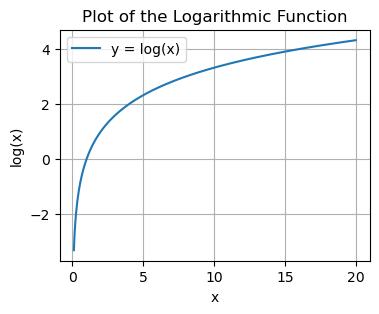

In [32]:

x = np.linspace(0.1, 20, 400)
y = np.log2(x)

plt.figure(figsize=(4, 3))
plt.plot(x, y, label='y = log(x)')
plt.title('Plot of the Logarithmic Function')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.grid(True)
plt.legend()
plt.show()
